MohammadReza Lalehgani

4041406420

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('final.csv')

In [3]:
print(df.shape)

(73838, 11)


In [4]:
print(df.columns)

Index(['شهر', 'رتبه کشوری', 'رتبه در منطقه', 'منطقه', 'سابقه کانونی',
       'میانگین تراز کانون', 'تعداد آزمون', 'رشته قبولی', 'دانشگاه قبولی',
       'رشته مدرسه', 'سال'],
      dtype='object')


Get some info from data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73838 entries, 0 to 73837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   شهر                 73838 non-null  object 
 1   رتبه کشوری          73838 non-null  int64  
 2   رتبه در منطقه       73838 non-null  float64
 3   منطقه               73838 non-null  object 
 4   سابقه کانونی        73838 non-null  int64  
 5   میانگین تراز کانون  73838 non-null  int64  
 6   تعداد آزمون         73838 non-null  float64
 7   رشته قبولی          73838 non-null  object 
 8   دانشگاه قبولی       73838 non-null  object 
 9   رشته مدرسه          73838 non-null  object 
 10  سال                 73838 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 6.2+ MB


List of numeric features

In [8]:
df.select_dtypes(include=['number']).columns

Index(['رتبه کشوری', 'رتبه در منطقه', 'سابقه کانونی', 'میانگین تراز کانون',
       'تعداد آزمون', 'سال'],
      dtype='object')

List of objection features

In [9]:
df.select_dtypes(include=['object']).columns

Index(['شهر', 'منطقه', 'رشته قبولی', 'دانشگاه قبولی', 'رشته مدرسه'], dtype='object')

In [10]:
print(df.isnull().sum())

شهر                   0
رتبه کشوری            0
رتبه در منطقه         0
منطقه                 0
سابقه کانونی          0
میانگین تراز کانون    0
تعداد آزمون           0
رشته قبولی            0
دانشگاه قبولی         0
رشته مدرسه            0
سال                   0
dtype: int64


dataset hasn't got missing values

In [11]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates (if any)
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


Outliers Detection

Outliers are extreme values that deviate significantly from the rest of the data. The most common method for detecting outliers is the IQR method (Interquartile Range).

In [12]:
import matplotlib.pyplot as plt

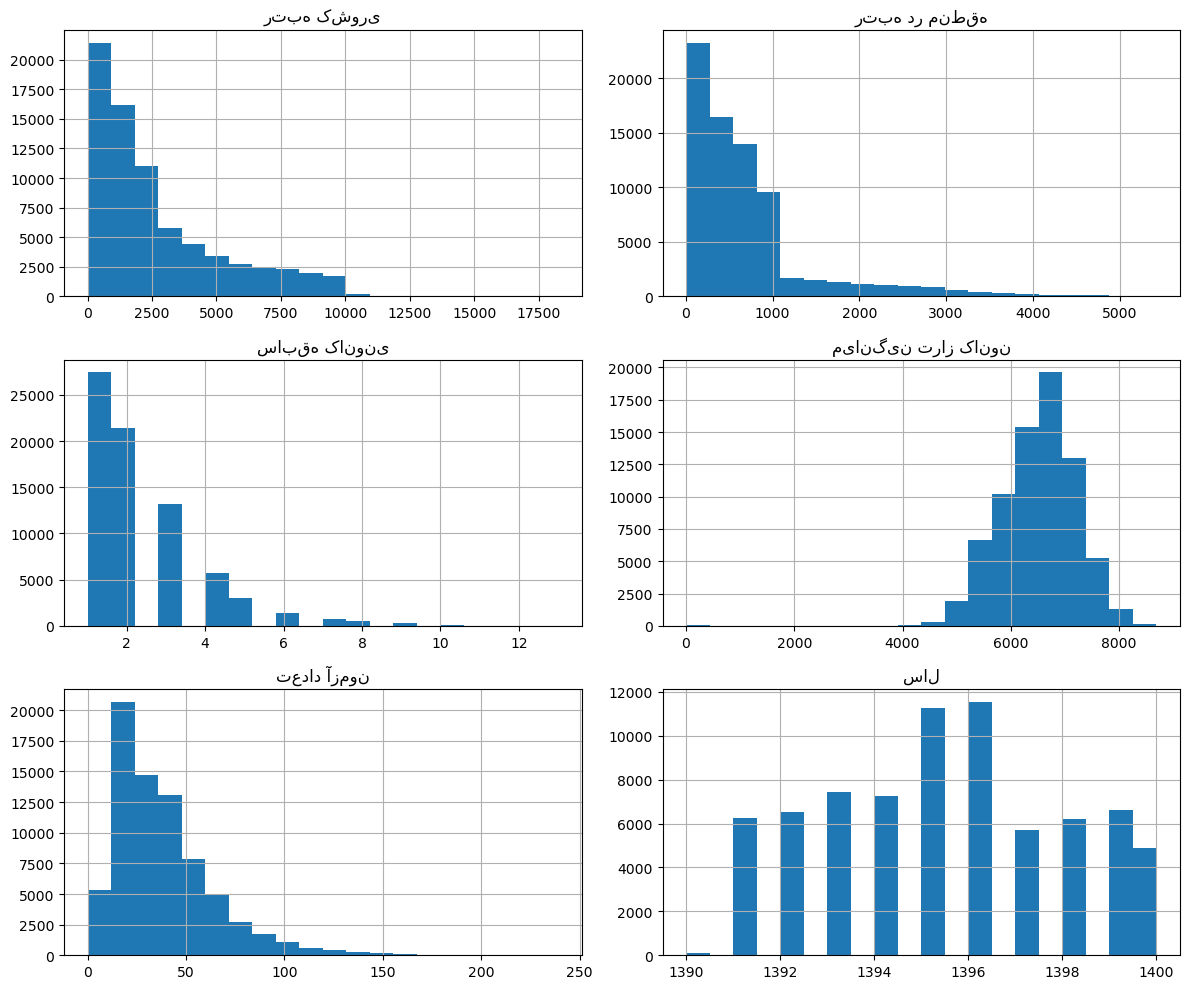

In [13]:
df.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

In [15]:
import seaborn as sns

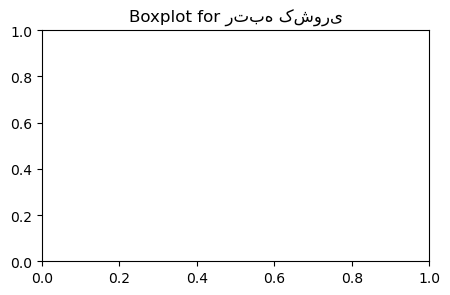

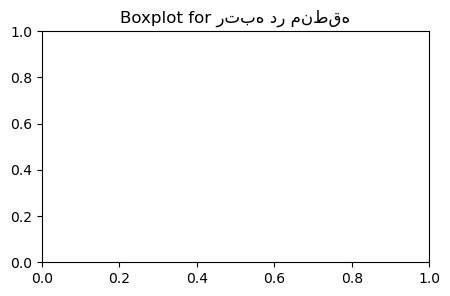

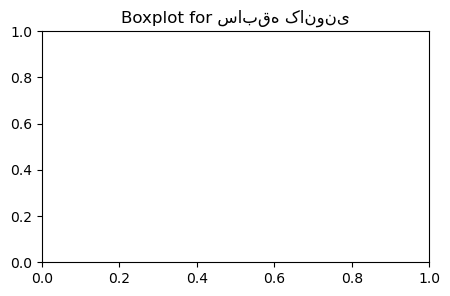

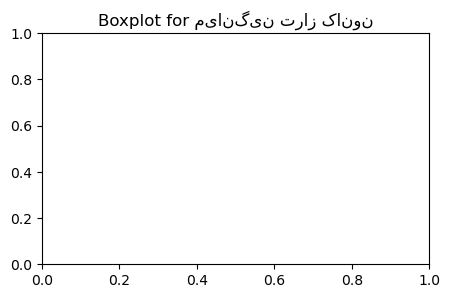

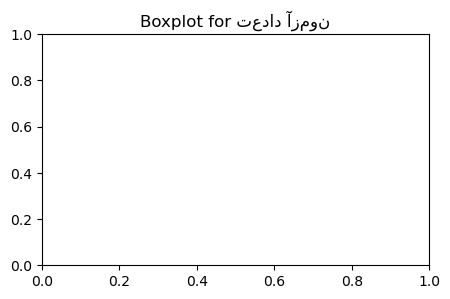

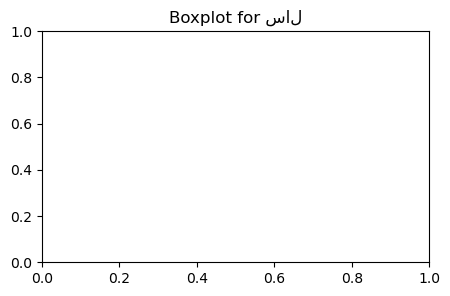

In [15]:
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(5, 3))
    plt.title(f'Boxplot for {col}')
    plt.show()


I choose
"رتبه کشوری"
for target

Don't remove outlier for save the model from overfitting

In [16]:
numerical_cols = df.select_dtypes(include=['number']).columns
print(f"Numerical columns: {numerical_cols}")

Numerical columns: Index(['رتبه کشوری', 'رتبه در منطقه', 'سابقه کانونی', 'میانگین تراز کانون',
       'تعداد آزمون', 'سال'],
      dtype='object')


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())


       شهر  رتبه کشوری  رتبه در منطقه    منطقه  سابقه کانونی  \
0    تهران   -1.056779      -0.908783  منطقه 1      0.472216   
1  رفسنجان   -1.056384      -0.908783  منطقه 2      2.471960   
2     اراك   -1.055988      -0.907480  منطقه 2      3.138541   
3     اراك   -1.055197      -0.904874  منطقه 2      0.472216   
4     مشهد   -1.054802      -0.907480  منطقه 1     -0.860946   

   میانگین تراز کانون  تعداد آزمون       رشته قبولی  \
0            1.765860     1.319918  مهندسي کامپيوتر   
1            1.937609     3.181950  مهندسي کامپيوتر   
2            1.550814     4.035381  مهندسي کامپيوتر   
3            1.464218     1.591464  مهندسي کامپيوتر   
4            1.631636    -0.580907  مهندسي کامپيوتر   

                دانشگاه قبولی رشته مدرسه       سال  
0  دانشگاه صنعتي شريف - تهران      ریاضی  1.774757  
1  دانشگاه صنعتي شريف - تهران      ریاضی  1.774757  
2  دانشگاه صنعتي شريف - تهران      ریاضی  1.774757  
3  دانشگاه صنعتي شريف - تهران      ریاضی  1.774757  
4  دانشگاه صنعتي شر

In [18]:
from sklearn.preprocessing import StandardScaler

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['رشته قبولی', 'دانشگاه قبولی', 'رشته مدرسه', 'منطقه', 'شهر'], drop_first=True)

X = df_encoded.drop(columns=['رتبه کشوری'])  
y = df_encoded['رتبه کشوری']  


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


Training data shape: (59070, 3126), Test data shape: (14768, 3126)


In [20]:
for col in numerical_cols:
    print(f"مقادیر غیر عددی در ستون {col}:")
    print(df[df[col].apply(pd.to_numeric, errors='coerce').isna()][col])


مقادیر غیر عددی در ستون رتبه کشوری:
Series([], Name: رتبه کشوری, dtype: float64)
مقادیر غیر عددی در ستون رتبه در منطقه:
Series([], Name: رتبه در منطقه, dtype: float64)
مقادیر غیر عددی در ستون سابقه کانونی:
Series([], Name: سابقه کانونی, dtype: float64)
مقادیر غیر عددی در ستون میانگین تراز کانون:
Series([], Name: میانگین تراز کانون, dtype: float64)
مقادیر غیر عددی در ستون تعداد آزمون:
Series([], Name: تعداد آزمون, dtype: float64)
مقادیر غیر عددی در ستون سال:
Series([], Name: سال, dtype: float64)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")


Linear Regression MSE: 0.17524136833372753


In [22]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

thresholds = [0, 1000, 2000, 3000, 4000] 

y_test_discretized = np.digitize(y_test, thresholds)
y_pred_discretized = np.digitize(y_pred_lr, thresholds)

accuracy = accuracy_score(y_test_discretized, y_pred_discretized)
f1 = f1_score(y_test_discretized, y_pred_discretized, average='weighted')  

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Accuracy: 0.9042524377031419
F1 Score: 0.9058999244397071


RandomForestRegressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Regressor MSE: {mse_rf}")


Random Forest Regressor MSE: 0.0072149825226120335


GradientBoostingRegressor

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting Regressor MSE: {mse_gb}")


Gradient Boosting Regressor MSE: 0.06447558174539354


MLPRegressor

In [25]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f"MLP Model MSE: {mse_mlp}")


MLP Model MSE: 0.008506356677348437


Now I changed hyper parameter in MLP model 

Change max_iter 1000 to 2000

In [26]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=2000, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f"MLP Model MSE: {mse_mlp}")


MLP Model MSE: 0.008506356677348437


Change hidden layer to 3 

Best MSE result

In [27]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

mlp_model = MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=2000, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f"MLP Model MSE: {mse_mlp}")


MLP Model MSE: 0.00760974962969949


Change learning_rate 

In [28]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), learning_rate='adaptive',max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f"MLP Model MSE: {mse_mlp}")


MLP Model MSE: 0.008506356677348437


Change activation function defult to tanh

In [29]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='tanh', random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f"MLP Model MSE: {mse_mlp}")


MLP Model MSE: 0.008458053446545856


In [30]:
thresholds = [0, 1000, 2000, 3000, 4000]  
y_test_discretized = np.digitize(y_test, thresholds)
y_pred_mlp_discretized = np.digitize(y_pred_mlp, thresholds)
y_pred_lr_discretized = np.digitize(y_pred_lr, thresholds)
y_pred_rf_discretized = np.digitize(y_pred_rf, thresholds)
y_pred_gb_discretized = np.digitize(y_pred_gb, thresholds)


In [31]:
from sklearn.metrics import r2_score
# MLP 
accuracy_mlp = accuracy_score(y_test_discretized, y_pred_mlp_discretized)
f1_mlp = f1_score(y_test_discretized, y_pred_mlp_discretized, average='weighted')
r2_mlp = r2_score(y_test, y_pred_mlp)

# Linear Regression Model 
accuracy_lr = accuracy_score(y_test_discretized, y_pred_lr_discretized)
f1_lr = f1_score(y_test_discretized, y_pred_lr_discretized, average='weighted')
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest Regressor Model 
accuracy_rf = accuracy_score(y_test_discretized, y_pred_rf_discretized)
f1_rf = f1_score(y_test_discretized, y_pred_rf_discretized, average='weighted')
r2_rf = r2_score(y_test, y_pred_rf)

# Gradient Boosting Regressor Model 
accuracy_gb = accuracy_score(y_test_discretized, y_pred_gb_discretized)
f1_gb = f1_score(y_test_discretized, y_pred_gb_discretized, average='weighted')
r2_gb = r2_score(y_test, y_pred_gb)


In [32]:
print(f"MLP Model - Accuracy: {accuracy_mlp:.4f}, F1 Score: {f1_mlp:.4f}, R²: {r2_mlp:.4f}")
print(f"Linear Regression Model - Accuracy: {accuracy_lr:.4f}, F1 Score: {f1_lr:.4f}, R²: {r2_lr:.4f}")
print(f"Random Forest Regressor - Accuracy: {accuracy_rf:.4f}, F1 Score: {f1_rf:.4f}, R²: {r2_rf:.4f}")
print(f"Gradient Boosting Regressor - Accuracy: {accuracy_gb:.4f}, F1 Score: {f1_gb:.4f}, R²: {r2_gb:.4f}")
from sklearn.metrics import r2_score

MLP Model - Accuracy: 0.9835, F1 Score: 0.9835, R²: 0.9915
Linear Regression Model - Accuracy: 0.9043, F1 Score: 0.9059, R²: 0.8230
Random Forest Regressor - Accuracy: 0.9952, F1 Score: 0.9952, R²: 0.9927
Gradient Boosting Regressor - Accuracy: 0.9487, F1 Score: 0.9490, R²: 0.9349


Phase 2

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import math
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, r2_score, precision_recall_fscore_support, confusion_matrix
import time

In [36]:
# ============================================
# FIXED: TABTRANSFORMER IMPLEMENTATION
# ============================================

class CategoricalEmbedding(nn.Module):
    """Embedding layer for categorical features"""
    def __init__(self, cat_cols, cat_dfs, embedding_dim=32):
        super().__init__()
        self.cat_cols = cat_cols
        self.embeddings = nn.ModuleDict()
        
        for col in cat_cols:
            n_categories = len(cat_dfs[col].unique())
            # Recommended embedding size: min(600, round(1.6 * n_categories^0.56))
            emb_dim = min(embedding_dim, max(4, int(1.6 * n_categories ** 0.56)))
            self.embeddings[col] = nn.Embedding(n_categories, emb_dim)
            print(f"Column '{col}': {n_categories} categories -> embedding dim: {emb_dim}")
            
    def forward(self, x_cat):
        embeddings = []
        for i, col in enumerate(self.cat_cols):
            emb = self.embeddings[col](x_cat[:, i].long())
            embeddings.append(emb)
        return torch.cat(embeddings, dim=1)

class TransformerBlock(nn.Module):
    """Single Transformer encoder block"""
    def __init__(self, d_model, n_heads, d_ff, dropout=0.1):
        super().__init__()
        # Ensure d_model is divisible by n_heads
        assert d_model % n_heads == 0, f"d_model ({d_model}) must be divisible by n_heads ({n_heads})"
        
        self.attention = nn.MultiheadAttention(d_model, n_heads, dropout=dropout, batch_first=True)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.ff = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(d_ff, d_model)
        )
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        # Self-attention with residual
        attn_out, _ = self.attention(x, x, x)
        x = self.norm1(x + self.dropout(attn_out))
        
        # Feed-forward with residual
        ff_out = self.ff(x)
        x = self.norm2(x + self.dropout(ff_out))
        return x

class TabTransformer(nn.Module):
    """TabTransformer model for tabular data"""
    def __init__(self, numerical_cols, categorical_cols, cat_dfs, 
                 embedding_dim=32, n_heads=4, n_layers=2, d_ff=128, dropout=0.1):
        super().__init__()
        
        self.numerical_cols = numerical_cols
        self.categorical_cols = categorical_cols
        self.num_dim = len(numerical_cols)
        
        # Categorical embeddings
        self.cat_embedding = CategoricalEmbedding(categorical_cols, cat_dfs, embedding_dim)
        
        # Calculate total categorical embedding dimension
        self.cat_emb_dim_raw = sum([self.cat_embedding.embeddings[col].embedding_dim 
                                   for col in categorical_cols])
        
        # Adjust embedding dimension to be divisible by n_heads
        # Find the nearest number divisible by n_heads
        self.cat_emb_dim = ((self.cat_emb_dim_raw + n_heads - 1) // n_heads) * n_heads
        
        print(f"Raw categorical embedding dimension: {self.cat_emb_dim_raw}")
        print(f"Adjusted categorical embedding dimension (divisible by {n_heads}): {self.cat_emb_dim}")
        print(f"Numerical dimension: {self.num_dim}")
        
        # Projection layer to adjust embedding dimension if needed
        if self.cat_emb_dim_raw != self.cat_emb_dim:
            self.embedding_projection = nn.Linear(self.cat_emb_dim_raw, self.cat_emb_dim)
        else:
            self.embedding_projection = nn.Identity()
        
        # CLS token for classification/regression
        self.cls_token = nn.Parameter(torch.randn(1, 1, self.cat_emb_dim))
        
        # Transformer blocks
        self.transformer_blocks = nn.ModuleList([
            TransformerBlock(self.cat_emb_dim, n_heads, d_ff, dropout)
            for _ in range(n_layers)
        ])
        
        # Final MLP
        mlp_input_dim = self.cat_emb_dim + self.num_dim
        self.mlp = nn.Sequential(
            nn.Linear(mlp_input_dim, 128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(64, 1)
        )
        
    def forward(self, x_num, x_cat):
        # Get categorical embeddings
        cat_emb = self.cat_embedding(x_cat)  # [batch, cat_emb_dim_raw]
        
        # Project to adjusted dimension
        cat_emb = self.embedding_projection(cat_emb)  # [batch, cat_emb_dim]
        
        # Add CLS token
        batch_size = cat_emb.shape[0]
        cls_tokens = self.cls_token.expand(batch_size, -1, -1)
        cat_emb = cat_emb.unsqueeze(1)  # [batch, 1, cat_emb_dim]
        transformer_input = torch.cat([cls_tokens, cat_emb], dim=1)  # [batch, 2, cat_emb_dim]
        
        # Apply transformer blocks
        for transformer in self.transformer_blocks:
            transformer_input = transformer(transformer_input)
        
        # Take CLS token output
        cat_features = transformer_input[:, 0, :]  # [batch, cat_emb_dim]
        
        # Concatenate with numerical features
        combined = torch.cat([cat_features, x_num], dim=1)
        
        # Final prediction
        output = self.mlp(combined)
        return output.squeeze()


def prepare_tabtransformer_data(df, numerical_cols, categorical_cols, target_col, test_size=0.2, batch_size=256):
    """Prepare data loaders for TabTransformer from original DataFrame"""
    
    # Split data
    from sklearn.model_selection import train_test_split
    
    X = df[categorical_cols + numerical_cols]
    y = df[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )
    
    # Encode categorical columns
    cat_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col].astype(str))
        # Handle unseen categories in test set
        X_test[col] = X_test[col].astype(str)
        X_test[col] = X_test[col].apply(lambda x: x if x in le.classes_ else le.classes_[0])
        X_test[col] = le.transform(X_test[col])
        cat_encoders[col] = le
    
    # Convert to tensors
    X_train_num = torch.tensor(X_train[numerical_cols].values, dtype=torch.float32)
    X_train_cat = torch.tensor(X_train[categorical_cols].values, dtype=torch.long)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
    
    X_test_num = torch.tensor(X_test[numerical_cols].values, dtype=torch.float32)
    X_test_cat = torch.tensor(X_test[categorical_cols].values, dtype=torch.long)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)
    
    # Create datasets
    train_dataset = TensorDataset(X_train_num, X_train_cat, y_train_tensor)
    test_dataset = TensorDataset(X_test_num, X_test_cat, y_test_tensor)
    
    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    print(f"Training samples: {len(X_train)}")
    print(f"Test samples: {len(X_test)}")
    print(f"Numerical features: {len(numerical_cols)}")
    print(f"Categorical features: {len(categorical_cols)}")
    
    return train_loader, test_loader, y_train, y_test, cat_encoders


def train_tabtransformer(model, train_loader, val_loader, epochs=30, lr=1e-3, device='cpu'):
    """Training function for TabTransformer"""
    model = model.to(device)
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)
    criterion = nn.MSELoss()
    
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0
        for x_num, x_cat, y in train_loader:
            x_num, x_cat, y = x_num.to(device), x_cat.to(device), y.to(device)
            
            optimizer.zero_grad()
            y_pred = model(x_num, x_cat)
            loss = criterion(y_pred, y)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            
            train_loss += loss.item()
        
        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for x_num, x_cat, y in val_loader:
                x_num, x_cat, y = x_num.to(device), x_cat.to(device), y.to(device)
                y_pred = model(x_num, x_cat)
                loss = criterion(y_pred, y)
                val_loss += loss.item()
        
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        
        scheduler.step(avg_val_loss)
        
        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.6f}, Val Loss: {avg_val_loss:.6f}')
    
    return train_losses, val_losses


Training TabTransformer Model...
Training samples: 59070
Test samples: 14768
Numerical features: 5
Categorical features: 5
Column 'منطقه': 11 categories -> embedding dim: 6
Column 'رشته قبولی': 2174 categories -> embedding dim: 32
Column 'دانشگاه قبولی': 450 categories -> embedding dim: 32
Column 'رشته مدرسه': 5 categories -> embedding dim: 4
Column 'شهر': 486 categories -> embedding dim: 32
Raw categorical embedding dimension: 106
Adjusted categorical embedding dimension (divisible by 2): 106
Numerical dimension: 5

Total parameters: 268,693
Epoch [5/30], Train Loss: 0.030071, Val Loss: 0.020336
Epoch [10/30], Train Loss: 0.021351, Val Loss: 0.018726
Epoch [15/30], Train Loss: 0.017547, Val Loss: 0.014967
Epoch [20/30], Train Loss: 0.016253, Val Loss: 0.011802
Epoch [25/30], Train Loss: 0.014843, Val Loss: 0.013844
Epoch [30/30], Train Loss: 0.011217, Val Loss: 0.011043

TABTRANSFORMER RESULTS
MSE: 0.011048
RMSE: 0.1051
R²: 0.9888
MAE: 0.0463
Training Time: 63.85 seconds
Accuracy (di

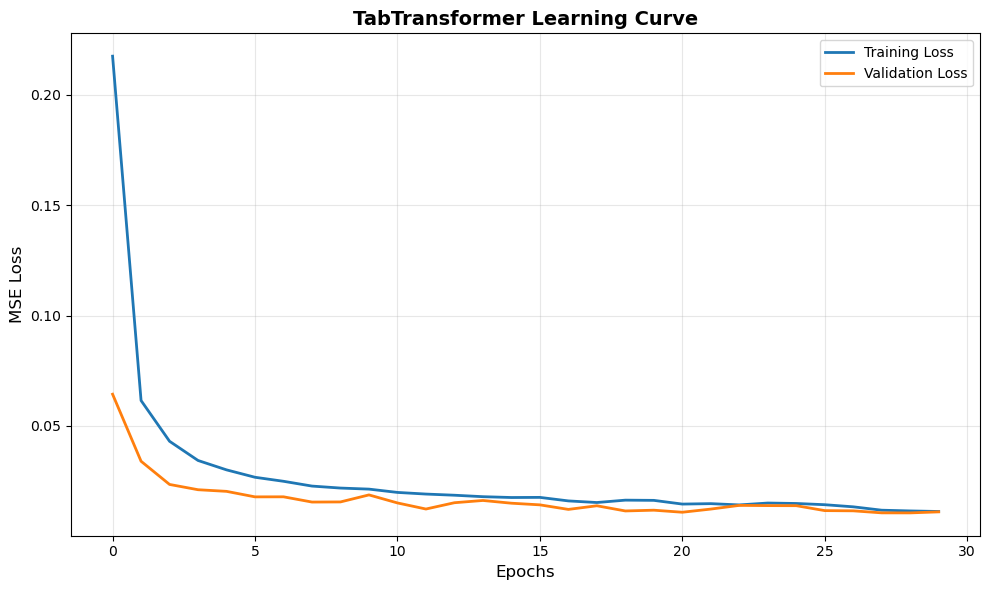

In [37]:
# ============================================
# RUN TABTRANSFORMER - FIXED VERSION
# ============================================

print("\n" + "=" * 50)
print("Training TabTransformer Model...")
print("=" * 50)

# Define columns
target_col = 'رتبه کشوری'
numerical_cols = ['رتبه در منطقه', 'سابقه کانونی', 'میانگین تراز کانون', 'تعداد آزمون', 'سال']
categorical_cols = ['منطقه', 'رشته قبولی', 'دانشگاه قبولی', 'رشته مدرسه', 'شهر']

# Make sure we're using the original data (not one-hot encoded)
if 'رشته قبولی' not in df_original.columns:
    print("Loading original data from CSV...")
    df_original = pd.read_csv('final.csv')
    # Scale numerical columns
    scaler = StandardScaler()
    df_original[numerical_cols + [target_col]] = scaler.fit_transform(df_original[numerical_cols + [target_col]])

# Option 1: Use n_heads=2 (divisor of 106? No, 106/2=53 ✅)
# Option 2: Use n_heads=1 (always works)
# Option 3: Use projection layer to make dimension divisible by n_heads (implemented above)

# Prepare data
train_loader, test_loader, y_train_tt, y_test_tt, cat_encoders = prepare_tabtransformer_data(
    df_original, numerical_cols, categorical_cols, target_col, 
    test_size=0.2, batch_size=256
)

# Initialize model with n_heads=2 (since 106 is divisible by 2)
# Or use n_heads=1 (always works)
tabtransformer_model = TabTransformer(
    numerical_cols=numerical_cols,
    categorical_cols=categorical_cols,
    cat_dfs=df_original,
    embedding_dim=32,
    n_heads=2,  # Changed from 4 to 2 (106 is divisible by 2)
    n_layers=2,
    d_ff=128,
    dropout=0.1
)

# Count parameters
total_params = sum(p.numel() for p in tabtransformer_model.parameters())
print(f"\nTotal parameters: {total_params:,}")

# Train model
import time
start_time = time.time()
train_losses_tt, val_losses_tt = train_tabtransformer(
    tabtransformer_model, train_loader, test_loader, 
    epochs=30, lr=1e-3, device='cpu'
)
tt_train_time = time.time() - start_time

# Evaluate
tabtransformer_model.eval()
y_pred_tt = []
y_true_tt = []
with torch.no_grad():
    for x_num, x_cat, y in test_loader:
        y_pred = tabtransformer_model(x_num, x_cat)
        y_pred_tt.extend(y_pred.numpy())
        y_true_tt.extend(y.numpy())

y_pred_tt = np.array(y_pred_tt)
y_true_tt = np.array(y_true_tt)

# Calculate metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse_tt = mean_squared_error(y_true_tt, y_pred_tt)
rmse_tt = np.sqrt(mse_tt)
r2_tt = r2_score(y_true_tt, y_pred_tt)
mae_tt = mean_absolute_error(y_true_tt, y_pred_tt)

print(f"\n" + "=" * 50)
print("TABTRANSFORMER RESULTS")
print("=" * 50)
print(f"MSE: {mse_tt:.6f}")
print(f"RMSE: {rmse_tt:.4f}")
print(f"R²: {r2_tt:.4f}")
print(f"MAE: {mae_tt:.4f}")
print(f"Training Time: {tt_train_time:.2f} seconds")

# Classification metrics for discretized values
thresholds = [-float('inf'), 0, 1000, 2000, 3000, 4000, float('inf')]
y_test_disc = np.digitize(y_true_tt, thresholds)
y_pred_tt_disc = np.digitize(y_pred_tt, thresholds)

from sklearn.metrics import accuracy_score, f1_score
accuracy_tt = accuracy_score(y_test_disc, y_pred_tt_disc)
f1_tt = f1_score(y_test_disc, y_pred_tt_disc, average='weighted')

print(f"Accuracy (discretized): {accuracy_tt:.4f}")
print(f"F1-Score (discretized): {f1_tt:.4f}")

# Plot TabTransformer Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_losses_tt, label='Training Loss', linewidth=2)
plt.plot(val_losses_tt, label='Validation Loss', linewidth=2)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('MSE Loss', fontsize=12)
plt.title('TabTransformer Learning Curve', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('tabtransformer_learning_curve.png', dpi=150)
plt.show()


Starting Advanced Numerical Embeddings Training...

ADVANCED NUMERICAL EMBEDDINGS FOR TABULAR DATA

Preparing data for advanced numerical embeddings...
Training set: 59070 samples
Test set: 14768 samples
Categorical features: 5
Numerical features: 5
Categorical cardinalities: [11, 1944, 427, 5, 479]

--------------------------------------------------
MODEL 1: PLR (Periodic Linear Regression) Embedding
--------------------------------------------------

Initializing PLR embedding for 5 numerical features...
  Categorical feature 1: 11 categories -> embedding dim: 6
  Categorical feature 2: 1944 categories -> embedding dim: 16
  Categorical feature 3: 427 categories -> embedding dim: 16
  Categorical feature 4: 5 categories -> embedding dim: 4
  Categorical feature 5: 479 categories -> embedding dim: 16
Total input dimension: 90 (num: 32, cat: 58)
Total parameters: 66,615
Epoch [10/30], Train Loss: 0.033717, Val Loss: 0.056025, LR: 1.00e-03
Epoch [20/30], Train Loss: 0.024954, Val Loss:

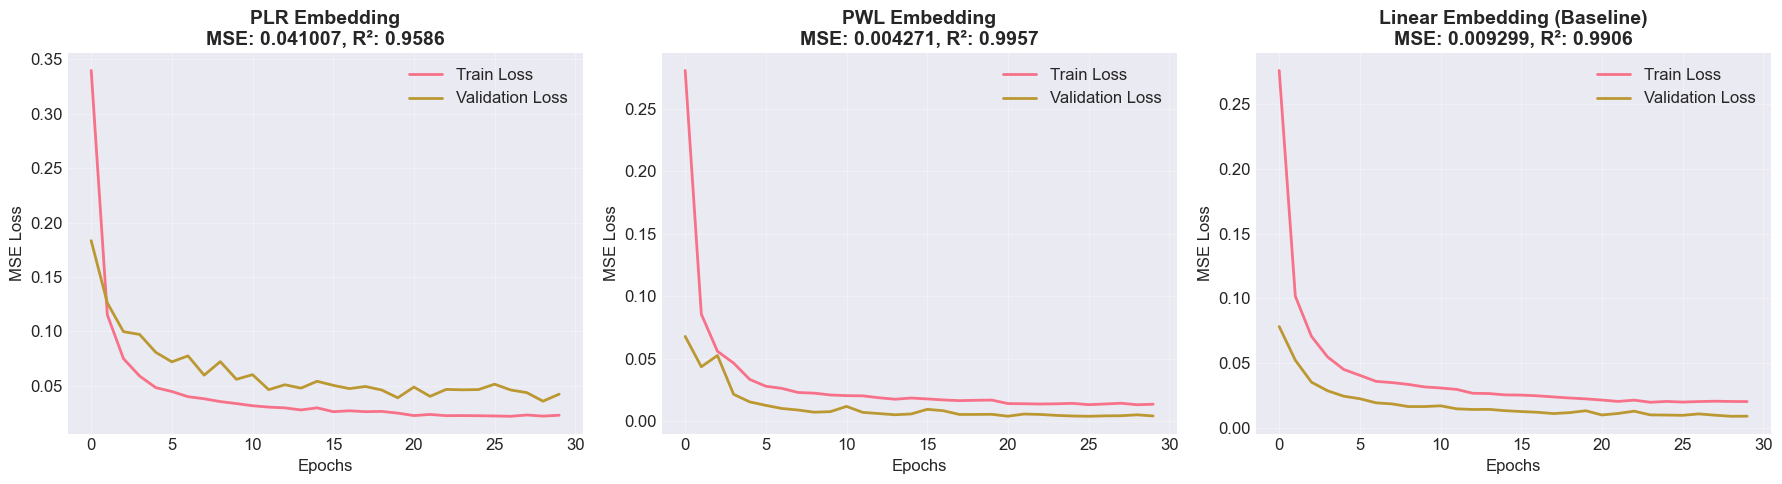

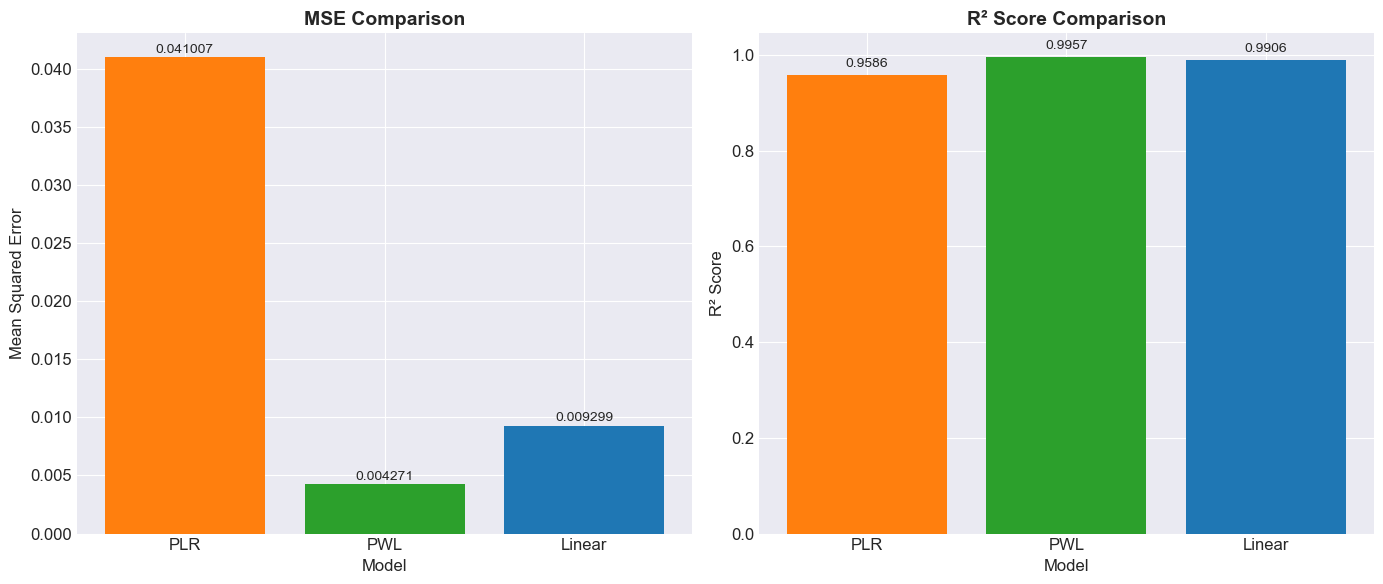

In [45]:
# ============================================
# FIXED: ADVANCED NUMERICAL EMBEDDINGS FOR TABULAR DATA
# ============================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
import time
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# ============================================
# PART 1: NUMERICAL EMBEDDING LAYERS
# ============================================

class PeriodicLinearEmbedding(nn.Module):
    """
    PLR (Periodic Linear Regression) Embedding for numerical features.
    """
    def __init__(self, n_features, embedding_dim=32, n_frequencies=16):
        super().__init__()
        self.n_features = n_features
        self.embedding_dim = embedding_dim
        self.n_frequencies = n_frequencies
        
        # Learnable frequencies and amplitudes
        self.frequencies = nn.Parameter(torch.randn(n_features, n_frequencies) * 0.1)
        
        # Ensure embedding_dim is divisible by n_frequencies or adjust
        freq_out_dim = max(1, embedding_dim // n_frequencies)
        self.amplitudes = nn.Parameter(torch.randn(n_features, n_frequencies, freq_out_dim) * 0.1)
        self.phase = nn.Parameter(torch.randn(n_features, n_frequencies) * 0.1)
        
        # Linear projection
        self.linear_proj = nn.Linear(n_features, embedding_dim)
        
        # Layer norm
        self.norm = nn.LayerNorm(embedding_dim)
        
    def forward(self, x):
        batch_size = x.shape[0]
        
        # Periodic encoding
        x_expanded = x.unsqueeze(-1)  # [batch, n_features, 1]
        
        # Expand frequencies and phase
        freq = self.frequencies.unsqueeze(0).expand(batch_size, -1, -1)
        phase = self.phase.unsqueeze(0).expand(batch_size, -1, -1)
        
        # Apply periodic activation
        periodic = torch.sin(2 * math.pi * freq * x_expanded + phase)
        
        # Weighted combination
        periodic_emb = torch.einsum('bnf,nfd->bnd', periodic, self.amplitudes)
        periodic_emb = periodic_emb.reshape(batch_size, -1)
        
        # Linear component
        linear_emb = self.linear_proj(x)
        
        # Ensure dimensions match
        if periodic_emb.shape[-1] != linear_emb.shape[-1]:
            proj = nn.Linear(periodic_emb.shape[-1], self.embedding_dim).to(x.device)
            periodic_emb = proj(periodic_emb)
        
        # Clone to avoid memory sharing issues
        output = periodic_emb.clone() + linear_emb
        output = self.norm(output)
        
        return output


class SimplifiedPiecewiseLinearEmbedding(nn.Module):
    """
    Simplified PWL Embedding that's safe and avoids gather errors.
    """
    def __init__(self, n_features, embedding_dim=32, n_knots=10):
        super().__init__()
        self.n_features = n_features
        self.embedding_dim = embedding_dim
        self.n_knots = n_knots
        
        # Learnable knots positions
        self.knots = nn.Parameter(torch.linspace(-2, 2, n_knots).unsqueeze(0).expand(n_features, -1).clone())
        
        # Learnable values at each knot
        self.knot_values = nn.Parameter(torch.randn(n_features, n_knots, embedding_dim) * 0.1)
        
        # Learnable scale and shift
        self.scale = nn.Parameter(torch.ones(n_features))
        self.shift = nn.Parameter(torch.zeros(n_features))
        
        # Output projection
        self.output_proj = nn.Linear(n_features * embedding_dim, embedding_dim)
        self.norm = nn.LayerNorm(embedding_dim)
        
    def forward(self, x):
        batch_size = x.shape[0]
        device = x.device
        
        # Normalize input (clone to avoid in-place issues)
        x = x.clone() * self.scale.unsqueeze(0) + self.shift.unsqueeze(0)
        
        # Initialize output tensor
        interpolated = torch.zeros(batch_size, self.n_features, self.embedding_dim, device=device)
        
        # For each feature, find knots and interpolate
        for feature_idx in range(self.n_features):
            x_feat = x[:, feature_idx]  # [batch]
            knots_feat = self.knots[feature_idx]  # [n_knots]
            values_feat = self.knot_values[feature_idx]  # [n_knots, embedding_dim]
            
            # Find knot indices for each batch element
            indices = torch.zeros(batch_size, dtype=torch.long, device=device)
            
            # Vectorized approach for better performance
            x_expanded = x_feat.unsqueeze(1)  # [batch, 1]
            knots_expanded = knots_feat.unsqueeze(0)  # [1, n_knots]
            
            # Count knots <= x
            mask = knots_expanded <= x_expanded
            indices = mask.sum(dim=1).clamp(1, self.n_knots - 1)
            
            idx_left = indices - 1
            idx_right = indices
            
            # Get knot positions
            knots_left = knots_feat[idx_left]
            knots_right = knots_feat[idx_right]
            
            # Get knot values using advanced indexing
            values_left = values_feat[idx_left]  # [batch, embedding_dim]
            values_right = values_feat[idx_right]  # [batch, embedding_dim]
            
            # Linear interpolation
            alpha = ((x_feat - knots_left) / (knots_right - knots_left + 1e-8)).unsqueeze(-1)
            interpolated[:, feature_idx, :] = values_left + alpha * (values_right - values_left)
        
        # Flatten and project
        flat = interpolated.reshape(batch_size, -1)
        output = self.output_proj(flat)
        output = self.norm(output)
        
        return output


# ============================================
# PART 2: COMPLETE MODEL
# ============================================

class AdvancedNumericalMLP(nn.Module):
    """
    MLP model with advanced numerical embeddings.
    """
    def __init__(self, 
                 numerical_cols,
                 categorical_cols,
                 cat_cardinalities,
                 num_embedding_type='plr',  # 'plr', 'pwl', or 'linear'
                 num_embedding_dim=32,
                 cat_embedding_dim=16,
                 hidden_dims=[128, 64],
                 dropout=0.1,
                 n_frequencies=16,
                 n_knots=10):
        super().__init__()
        
        self.numerical_cols = numerical_cols
        self.categorical_cols = categorical_cols
        self.num_embedding_type = num_embedding_type
        
        n_numerical = len(numerical_cols)
        n_categorical = len(categorical_cols)
        
        # 1. Numerical Embedding Layer
        print(f"\nInitializing {num_embedding_type.upper()} embedding for {n_numerical} numerical features...")
        
        if num_embedding_type == 'plr':
            self.num_embedding = PeriodicLinearEmbedding(
                n_numerical, 
                num_embedding_dim,
                n_frequencies=n_frequencies
            )
        elif num_embedding_type == 'pwl':
            self.num_embedding = SimplifiedPiecewiseLinearEmbedding(
                n_numerical,
                num_embedding_dim,
                n_knots=n_knots
            )
        else:  # linear
            self.num_embedding = nn.Linear(n_numerical, num_embedding_dim)
            self.num_norm = nn.LayerNorm(num_embedding_dim)
        
        # 2. Categorical Embedding Layers
        self.cat_embeddings = nn.ModuleList()
        cat_embedding_dims = []
        
        for i, cardinality in enumerate(cat_cardinalities):
            emb_dim = min(cat_embedding_dim, max(4, int(1.6 * cardinality ** 0.56)))
            cat_embedding_dims.append(emb_dim)
            self.cat_embeddings.append(
                nn.Embedding(cardinality, emb_dim)
            )
            print(f"  Categorical feature {i+1}: {cardinality} categories -> embedding dim: {emb_dim}")
        
        self.cat_embedding_dim_total = sum(cat_embedding_dims)
        
        # 3. MLP Head
        input_dim = num_embedding_dim + self.cat_embedding_dim_total
        print(f"Total input dimension: {input_dim} (num: {num_embedding_dim}, cat: {self.cat_embedding_dim_total})")
        
        layers = []
        prev_dim = input_dim
        
        for hidden_dim in hidden_dims:
            layers.extend([
                nn.Linear(prev_dim, hidden_dim),
                nn.BatchNorm1d(hidden_dim),
                nn.ReLU(),
                nn.Dropout(dropout)
            ])
            prev_dim = hidden_dim
        
        # Output layer
        layers.append(nn.Linear(prev_dim, 1))
        
        self.mlp = nn.Sequential(*layers)
        
        # Initialize weights
        self.apply(self._init_weights)
        
    def _init_weights(self, module):
        """Initialize weights using Xavier initialization"""
        if isinstance(module, nn.Linear):
            if module.weight.dim() >= 2:
                nn.init.xavier_uniform_(module.weight)
            if module.bias is not None:
                nn.init.constant_(module.bias, 0)
        elif isinstance(module, nn.Embedding):
            nn.init.normal_(module.weight, mean=0, std=0.01)
        elif isinstance(module, nn.LayerNorm):
            nn.init.constant_(module.weight, 1)
            nn.init.constant_(module.bias, 0)
    
    def forward(self, x_num, x_cat):
        """
        Forward pass
        """
        # Numerical embeddings
        if self.num_embedding_type == 'linear':
            num_emb = self.num_norm(self.num_embedding(x_num))
        else:
            num_emb = self.num_embedding(x_num)
        
        # Categorical embeddings
        cat_embs = []
        for i, emb_layer in enumerate(self.cat_embeddings):
            cat_embs.append(emb_layer(x_cat[:, i].long()))
        
        if cat_embs:
            cat_emb = torch.cat(cat_embs, dim=1)
        else:
            cat_emb = torch.zeros(x_num.shape[0], 0).to(x_num.device)
        
        # Combine
        combined = torch.cat([num_emb, cat_emb], dim=1)
        
        # MLP prediction
        output = self.mlp(combined)
        
        return output.squeeze()


# ============================================
# PART 3: DATA PREPARATION AND TRAINING
# ============================================

def prepare_advanced_data(df, numerical_cols, categorical_cols, target_col, 
                         test_size=0.2, batch_size=256, random_state=42):
    """
    Prepare data loaders for advanced numerical embedding models.
    """
    from sklearn.model_selection import train_test_split
    
    print("\nPreparing data for advanced numerical embeddings...")
    
    # Prepare features and target
    X = df[categorical_cols + numerical_cols].copy()
    y = df[target_col].copy()
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    print(f"Training set: {len(X_train)} samples")
    print(f"Test set: {len(X_test)} samples")
    
    # Encode categorical columns
    cat_encoders = {}
    cat_cardinalities = []
    
    for col in categorical_cols:
        le = LabelEncoder()
        # Fit on training data only
        X_train[col] = le.fit_transform(X_train[col].astype(str))
        
        # Handle unseen categories in test set
        X_test[col] = X_test[col].astype(str)
        X_test[col] = X_test[col].apply(
            lambda x: x if x in le.classes_ else le.classes_[0]
        )
        X_test[col] = le.transform(X_test[col])
        
        cat_encoders[col] = le
        cat_cardinalities.append(len(le.classes_))
    
    print(f"Categorical features: {len(categorical_cols)}")
    print(f"Numerical features: {len(numerical_cols)}")
    print(f"Categorical cardinalities: {cat_cardinalities}")
    
    # Convert to tensors
    X_train_num = torch.tensor(X_train[numerical_cols].values, dtype=torch.float32)
    X_train_cat = torch.tensor(X_train[categorical_cols].values, dtype=torch.long)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
    
    X_test_num = torch.tensor(X_test[numerical_cols].values, dtype=torch.float32)
    X_test_cat = torch.tensor(X_test[categorical_cols].values, dtype=torch.long)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)
    
    # Create datasets
    train_dataset = TensorDataset(X_train_num, X_train_cat, y_train_tensor)
    test_dataset = TensorDataset(X_test_num, X_test_cat, y_test_tensor)
    
    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, test_loader, y_test, cat_cardinalities, cat_encoders


def train_advanced_model(model, train_loader, val_loader, 
                        epochs=50, lr=1e-3, weight_decay=1e-5, 
                        device='cpu', verbose=True):
    """
    Training function with fixed optimizer to avoid memory issues.
    """
    model = model.to(device)
    
    # Use Adam instead of AdamW to avoid the weight decay issue
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    # Simple step scheduler
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)
    
    criterion = nn.MSELoss()
    
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        
        for x_num, x_cat, y in train_loader:
            x_num, x_cat, y = x_num.to(device), x_cat.to(device), y.to(device)
            
            optimizer.zero_grad()
            y_pred = model(x_num, x_cat)
            loss = criterion(y_pred, y)
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            train_loss += loss.item()
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        
        with torch.no_grad():
            for x_num, x_cat, y in val_loader:
                x_num, x_cat, y = x_num.to(device), x_cat.to(device), y.to(device)
                y_pred = model(x_num, x_cat)
                loss = criterion(y_pred, y)
                val_loss += loss.item()
        
        # Average losses
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        
        # Update learning rate
        scheduler.step()
        
        # Print progress
        if verbose and (epoch + 1) % 10 == 0:
            current_lr = scheduler.get_last_lr()[0]
            print(f'Epoch [{epoch+1}/{epochs}], '
                  f'Train Loss: {avg_train_loss:.6f}, '
                  f'Val Loss: {avg_val_loss:.6f}, '
                  f'LR: {current_lr:.2e}')
    
    return train_losses, val_losses


def evaluate_model(model, test_loader, y_test, device='cpu'):
    """
    Evaluate model and return predictions and metrics.
    """
    model.eval()
    model = model.to(device)
    
    y_pred = []
    y_true = []
    
    with torch.no_grad():
        for x_num, x_cat, y in test_loader:
            x_num, x_cat = x_num.to(device), x_cat.to(device)
            y_pred_batch = model(x_num, x_cat)
            y_pred.extend(y_pred_batch.cpu().numpy())
            y_true.extend(y.numpy())
    
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    
    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    
    return y_pred, y_true, {
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'mae': mae
    }


# ============================================
# PART 4: MAIN RUNNING FUNCTION
# ============================================

def run_advanced_numerical_embeddings(df_original):
    """
    Main function to run all advanced numerical embedding models.
    """
    print("\n" + "=" * 70)
    print("ADVANCED NUMERICAL EMBEDDINGS FOR TABULAR DATA")
    print("=" * 70)
    
    # Define columns
    target_col = 'رتبه کشوری'
    numerical_cols = ['رتبه در منطقه', 'سابقه کانونی', 'میانگین تراز کانون', 'تعداد آزمون', 'سال']
    categorical_cols = ['منطقه', 'رشته قبولی', 'دانشگاه قبولی', 'رشته مدرسه', 'شهر']
    
    # Prepare data
    train_loader, test_loader, y_test, cat_cardinalities, cat_encoders = prepare_advanced_data(
        df_original, numerical_cols, categorical_cols, target_col,
        test_size=0.2, batch_size=256, random_state=42
    )
    
    results = {}
    models = {}
    
    # ==========================================
    # 1. PLR Embedding Model
    # ==========================================
    print("\n" + "-" * 50)
    print("MODEL 1: PLR (Periodic Linear Regression) Embedding")
    print("-" * 50)
    
    plr_model = AdvancedNumericalMLP(
        numerical_cols=numerical_cols,
        categorical_cols=categorical_cols,
        cat_cardinalities=cat_cardinalities,
        num_embedding_type='plr',
        num_embedding_dim=32,
        cat_embedding_dim=16,
        hidden_dims=[128, 64],
        dropout=0.1,
        n_frequencies=16
    )
    
    # Count parameters
    total_params = sum(p.numel() for p in plr_model.parameters())
    print(f"Total parameters: {total_params:,}")
    
    # Train
    start_time = time.time()
    train_losses_plr, val_losses_plr = train_advanced_model(
        plr_model, train_loader, test_loader,
        epochs=30, lr=1e-3, device='cpu', verbose=True  # Reduced epochs to 30 for faster training
    )
    plr_train_time = time.time() - start_time
    
    # Evaluate
    y_pred_plr, y_true_plr, metrics_plr = evaluate_model(
        plr_model, test_loader, y_test, device='cpu'
    )
    metrics_plr['train_time'] = plr_train_time
    
    print(f"\nPLR Embedding Results:")
    print(f"  MSE:  {metrics_plr['mse']:.6f}")
    print(f"  RMSE: {metrics_plr['rmse']:.4f}")
    print(f"  R²:   {metrics_plr['r2']:.4f}")
    print(f"  MAE:  {metrics_plr['mae']:.4f}")
    print(f"  Time: {plr_train_time:.2f}s")
    
    results['PLR'] = {**metrics_plr, 'predictions': y_pred_plr}
    models['PLR'] = plr_model
    
    # ==========================================
    # 2. PWL Embedding Model
    # ==========================================
    print("\n" + "-" * 50)
    print("MODEL 2: PWL (Piecewise Linear) Embedding")
    print("-" * 50)
    
    pwl_model = AdvancedNumericalMLP(
        numerical_cols=numerical_cols,
        categorical_cols=categorical_cols,
        cat_cardinalities=cat_cardinalities,
        num_embedding_type='pwl',
        num_embedding_dim=32,
        cat_embedding_dim=16,
        hidden_dims=[128, 64],
        dropout=0.1,
        n_knots=10
    )
    
    # Count parameters
    total_params = sum(p.numel() for p in pwl_model.parameters())
    print(f"Total parameters: {total_params:,}")
    
    # Train
    start_time = time.time()
    train_losses_pwl, val_losses_pwl = train_advanced_model(
        pwl_model, train_loader, test_loader,
        epochs=30, lr=1e-3, device='cpu', verbose=True  # Reduced epochs to 30
    )
    pwl_train_time = time.time() - start_time
    
    # Evaluate
    y_pred_pwl, y_true_pwl, metrics_pwl = evaluate_model(
        pwl_model, test_loader, y_test, device='cpu'
    )
    metrics_pwl['train_time'] = pwl_train_time
    
    print(f"\nPWL Embedding Results:")
    print(f"  MSE:  {metrics_pwl['mse']:.6f}")
    print(f"  RMSE: {metrics_pwl['rmse']:.4f}")
    print(f"  R²:   {metrics_pwl['r2']:.4f}")
    print(f"  MAE:  {metrics_pwl['mae']:.4f}")
    print(f"  Time: {pwl_train_time:.2f}s")
    
    results['PWL'] = {**metrics_pwl, 'predictions': y_pred_pwl}
    models['PWL'] = pwl_model
    
    # ==========================================
    # 3. Baseline Linear Embedding Model
    # ==========================================
    print("\n" + "-" * 50)
    print("MODEL 3: Baseline Linear Embedding")
    print("-" * 50)
    
    linear_model = AdvancedNumericalMLP(
        numerical_cols=numerical_cols,
        categorical_cols=categorical_cols,
        cat_cardinalities=cat_cardinalities,
        num_embedding_type='linear',
        num_embedding_dim=32,
        cat_embedding_dim=16,
        hidden_dims=[128, 64],
        dropout=0.1
    )
    
    # Count parameters
    total_params = sum(p.numel() for p in linear_model.parameters())
    print(f"Total parameters: {total_params:,}")
    
    # Train
    start_time = time.time()
    train_losses_linear, val_losses_linear = train_advanced_model(
        linear_model, train_loader, test_loader,
        epochs=30, lr=1e-3, device='cpu', verbose=True
    )
    linear_train_time = time.time() - start_time
    
    # Evaluate
    y_pred_linear, y_true_linear, metrics_linear = evaluate_model(
        linear_model, test_loader, y_test, device='cpu'
    )
    metrics_linear['train_time'] = linear_train_time
    
    print(f"\nBaseline Linear Embedding Results:")
    print(f"  MSE:  {metrics_linear['mse']:.6f}")
    print(f"  RMSE: {metrics_linear['rmse']:.4f}")
    print(f"  R²:   {metrics_linear['r2']:.4f}")
    print(f"  MAE:  {metrics_linear['mae']:.4f}")
    print(f"  Time: {linear_train_time:.2f}s")
    
    results['Linear'] = {**metrics_linear, 'predictions': y_pred_linear}
    models['Linear'] = linear_model
    
    # ==========================================
    # Summary
    # ==========================================
    print("\n" + "=" * 70)
    print("SUMMARY: Advanced Numerical Embeddings Comparison")
    print("=" * 70)
    
    summary_df = pd.DataFrame({
        'Model': ['PLR', 'PWL', 'Linear (Baseline)'],
        'MSE': [results['PLR']['mse'], results['PWL']['mse'], results['Linear']['mse']],
        'RMSE': [results['PLR']['rmse'], results['PWL']['rmse'], results['Linear']['rmse']],
        'R²': [results['PLR']['r2'], results['PWL']['r2'], results['Linear']['r2']],
        'MAE': [results['PLR']['mae'], results['PWL']['mae'], results['Linear']['mae']],
        'Training Time (s)': [results['PLR']['train_time'], results['PWL']['train_time'], results['Linear']['train_time']]
    })
    
    print("\n", summary_df.to_string(index=False))
    
    # Save results
    summary_df.to_csv('numerical_embeddings_results.csv', index=False)
    print("\nResults saved to 'numerical_embeddings_results.csv'")
    
    # Plot learning curves
    try:
        import matplotlib.pyplot as plt
        
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        
        # PLR Learning Curve
        axes[0].plot(train_losses_plr, label='Train Loss', linewidth=2)
        axes[0].plot(val_losses_plr, label='Validation Loss', linewidth=2)
        axes[0].set_xlabel('Epochs', fontsize=12)
        axes[0].set_ylabel('MSE Loss', fontsize=12)
        axes[0].set_title(f'PLR Embedding\nMSE: {results["PLR"]["mse"]:.6f}, R²: {results["PLR"]["r2"]:.4f}', 
                         fontsize=14, fontweight='bold')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # PWL Learning Curve
        axes[1].plot(train_losses_pwl, label='Train Loss', linewidth=2)
        axes[1].plot(val_losses_pwl, label='Validation Loss', linewidth=2)
        axes[1].set_xlabel('Epochs', fontsize=12)
        axes[1].set_ylabel('MSE Loss', fontsize=12)
        axes[1].set_title(f'PWL Embedding\nMSE: {results["PWL"]["mse"]:.6f}, R²: {results["PWL"]["r2"]:.4f}', 
                         fontsize=14, fontweight='bold')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        # Linear Baseline Learning Curve
        axes[2].plot(train_losses_linear, label='Train Loss', linewidth=2)
        axes[2].plot(val_losses_linear, label='Validation Loss', linewidth=2)
        axes[2].set_xlabel('Epochs', fontsize=12)
        axes[2].set_ylabel('MSE Loss', fontsize=12)
        axes[2].set_title(f'Linear Embedding (Baseline)\nMSE: {results["Linear"]["mse"]:.6f}, R²: {results["Linear"]["r2"]:.4f}', 
                         fontsize=14, fontweight='bold')
        axes[2].legend()
        axes[2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('advanced_numerical_embeddings_comparison.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        # Bar chart comparison
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
        models_list = ['PLR', 'PWL', 'Linear']
        mse_values = [results['PLR']['mse'], results['PWL']['mse'], results['Linear']['mse']]
        r2_values = [results['PLR']['r2'], results['PWL']['r2'], results['Linear']['r2']]
        
        # MSE Comparison
        bars1 = axes[0].bar(models_list, mse_values, color=['#ff7f0e', '#2ca02c', '#1f77b4'])
        axes[0].set_xlabel('Model', fontsize=12)
        axes[0].set_ylabel('Mean Squared Error', fontsize=12)
        axes[0].set_title('MSE Comparison', fontsize=14, fontweight='bold')
        for bar, val in zip(bars1, mse_values):
            axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.0001,
                        f'{val:.6f}', ha='center', va='bottom', fontsize=10)
        
        # R² Comparison
        bars2 = axes[1].bar(models_list, r2_values, color=['#ff7f0e', '#2ca02c', '#1f77b4'])
        axes[1].set_xlabel('Model', fontsize=12)
        axes[1].set_ylabel('R² Score', fontsize=12)
        axes[1].set_title('R² Score Comparison', fontsize=14, fontweight='bold')
        for bar, val in zip(bars2, r2_values):
            axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                        f'{val:.4f}', ha='center', va='bottom', fontsize=10)
        
        plt.tight_layout()
        plt.savefig('numerical_embeddings_bar_chart.png', dpi=150, bbox_inches='tight')
        plt.show()
        
    except Exception as e:
        print(f"Visualization error (non-critical): {e}")
    
    return results, models, summary_df


# ============================================
# RUN THE MODELS
# ============================================

# Make sure we have the original data
if 'رشته قبولی' not in df_original.columns:
    print("Loading original data from CSV...")
    df_original = pd.read_csv('final.csv')
    # Scale numerical columns
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    numerical_cols = ['رتبه کشوری', 'رتبه در منطقه', 'سابقه کانونی', 'میانگین تراز کانون', 'تعداد آزمون', 'سال']
    df_original[numerical_cols] = scaler.fit_transform(df_original[numerical_cols])

# Run all advanced numerical embedding models
print("\nStarting Advanced Numerical Embeddings Training...")
results, models, summary_df = run_advanced_numerical_embeddings(df_original)

PHASE 4: MODEL COMPARISON
✓ Linear Regression loaded - R²: 0.8230
✓ Random Forest loaded - R²: 0.9927
✓ Gradient Boosting loaded - R²: 0.9349
✓ Basic MLP loaded - R²: 0.9915
✓ TabTransformer loaded - R²: 0.9888
✓ PLR Embedding loaded - R²: 0.9586
✓ PWL Embedding loaded - R²: 0.9957

RESULTS SUMMARY

             Model                   Type      MSE   RMSE    MAE     R²
    PWL Embedding Advanced Deep Learning 0.004271 0.0653 0.0316 0.9957
    Random Forest         Traditional ML 0.007215 0.0849 0.0163 0.9927
        Basic MLP    Basic Deep Learning 0.008458 0.0920 0.0442 0.9915
   TabTransformer Advanced Deep Learning 0.011048 0.1051 0.0463 0.9888
    PLR Embedding Advanced Deep Learning 0.041007 0.2025 0.1309 0.9586
Gradient Boosting         Traditional ML 0.064476 0.2539 0.1588 0.9349
Linear Regression         Traditional ML 0.175241 0.4186 0.2887 0.8230


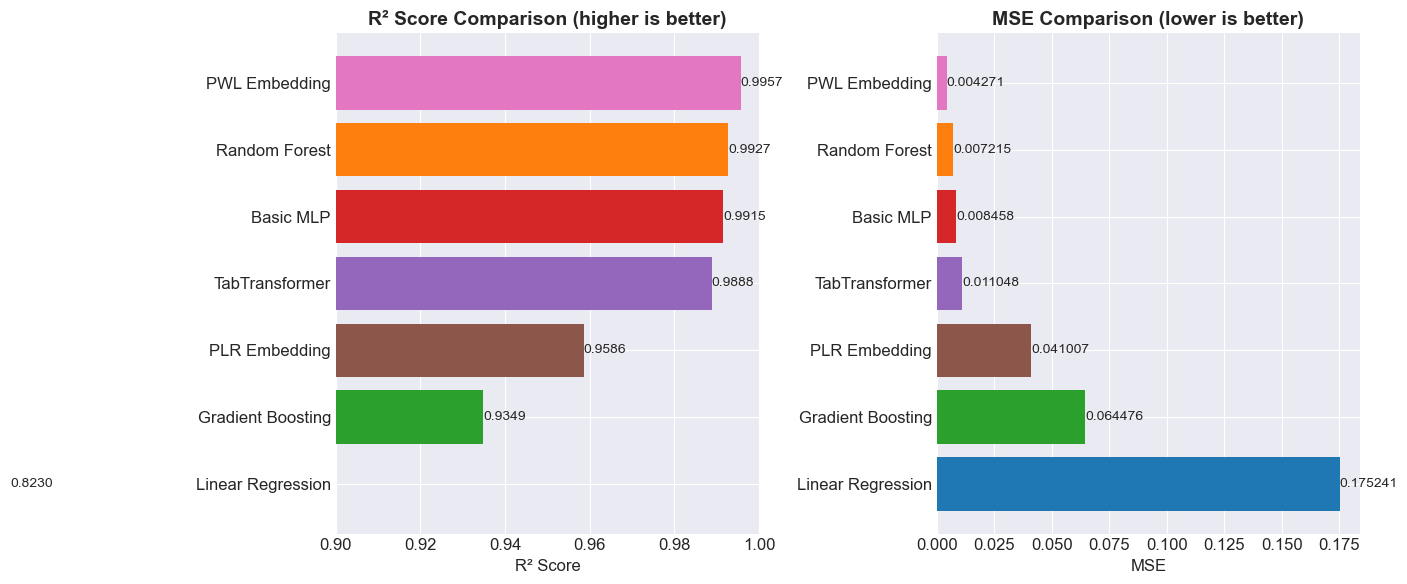


AVERAGE BY MODEL TYPE
                          mean  count
Type                                 
Advanced Deep Learning  0.9810      3
Basic Deep Learning     0.9915      1
Traditional ML          0.9169      3


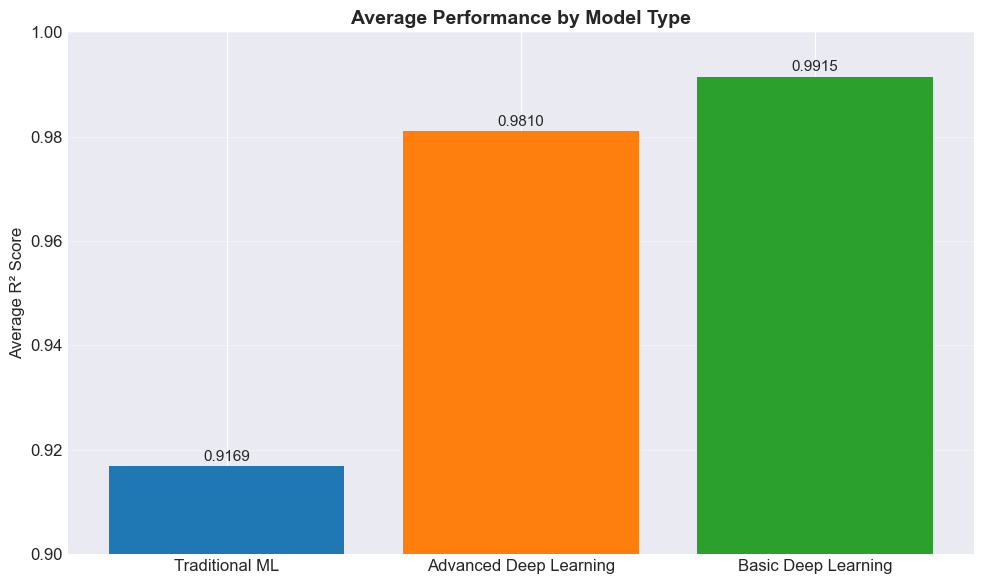

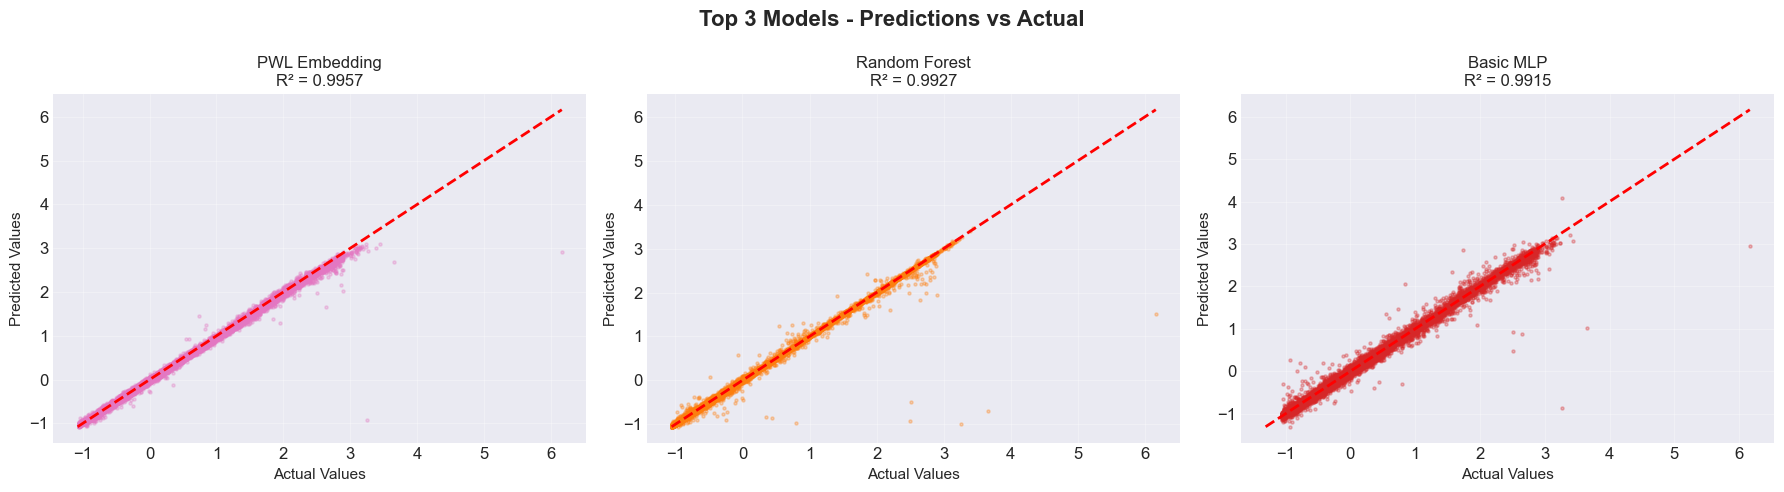


FINAL SUMMARY

    BEST MODEL: PWL Embedding
   • R² Score: 0.9957
   • RMSE: 0.0653
   • MAE: 0.0316

    MODEL TYPE PERFORMANCE:

   • Advanced Deep Learning: 0.9810 (from 3 models)
   • Basic Deep Learning: 0.9915 (from 1 models)
   • Traditional ML: 0.9169 (from 3 models)

   All results saved to:
   • phase4_results.csv
   • phase4_comparison.png
   • phase4_type_averages.png
   • phase4_top3_scatter.png



In [48]:
# ============================================
# PHASE 4: SIMPLIFIED MODEL COMPARISON
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 60)
print("PHASE 4: MODEL COMPARISON")
print("=" * 60)

# ============================================
# PART 1: COLLECT ALL MODEL PREDICTIONS
# ============================================

all_models = {}

# Helper function to safely add model
def add_model(name, y_pred, y_true, model_type, color):
    try:
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        
        all_models[name] = {
            'predictions': y_pred,
            'y_true': y_true,
            'mse': mse,
            'rmse': rmse,
            'mae': mae,
            'r2': r2,
            'type': model_type,
            'color': color
        }
        print(f"✓ {name} loaded - R²: {r2:.4f}")
        return True
    except Exception as e:
        print(f"✗ {name} not available: {e}")
        return False

# Add models from Phase 1
try:
    y_true = y_test.values if hasattr(y_test, 'values') else y_test
    add_model('Linear Regression', y_pred_lr, y_true, 'Traditional ML', '#1f77b4')
except: pass

try:
    add_model('Random Forest', y_pred_rf, y_true, 'Traditional ML', '#ff7f0e')
except: pass

try:
    add_model('Gradient Boosting', y_pred_gb, y_true, 'Traditional ML', '#2ca02c')
except: pass

try:
    add_model('Basic MLP', y_pred_mlp, y_true, 'Basic Deep Learning', '#d62728')
except: pass

# Add models from Phase 2 (TabTransformer)
try:
    if 'y_pred_tt' in dir() and 'y_true_tt' in dir():
        add_model('TabTransformer', y_pred_tt, y_true_tt, 'Advanced Deep Learning', '#9467bd')
except: pass

# Add models from Phase 3 (Advanced Embeddings)
try:
    if 'results' in dir() and 'PLR' in results:
        add_model('PLR Embedding', results['PLR']['predictions'], y_true, 'Advanced Deep Learning', '#8c564b')
except: pass

try:
    if 'results' in dir() and 'PWL' in results:
        add_model('PWL Embedding', results['PWL']['predictions'], y_true, 'Advanced Deep Learning', '#e377c2')
except: pass

# ============================================
# PART 2: RESULTS TABLE
# ============================================

print("\n" + "=" * 60)
print("RESULTS SUMMARY")
print("=" * 60)

results_df = pd.DataFrame([
    {
        'Model': name,
        'Type': data['type'],
        'MSE': f"{data['mse']:.6f}",
        'RMSE': f"{data['rmse']:.4f}",
        'MAE': f"{data['mae']:.4f}",
        'R²': f"{data['r2']:.4f}"
    }
    for name, data in all_models.items()
])

# Sort by R² (best first)
results_df = results_df.sort_values('R²', ascending=False).reset_index(drop=True)
print("\n", results_df.to_string(index=False))

# ============================================
# PART 3: SIMPLE BAR CHART COMPARISON
# ============================================

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

plot_df = results_df.copy()
plot_df['R²_value'] = plot_df['R²'].astype(float)
plot_df = plot_df.sort_values('R²_value', ascending=True)

models = plot_df['Model'].values
r2_values = plot_df['R²_value'].values
colors = [all_models[m]['color'] for m in models]

ax = axes[0]
bars = ax.barh(models, r2_values, color=colors)
ax.set_xlabel('R² Score', fontsize=12)
ax.set_title('R² Score Comparison (higher is better)', fontsize=14, fontweight='bold')
ax.set_xlim(0.9, 1.0)
for bar, val in zip(bars, r2_values):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
            f'{val:.4f}', va='center', fontsize=10)

ax = axes[1]
mse_values = plot_df['MSE'].astype(float).values
bars = ax.barh(models, mse_values, color=colors)
ax.set_xlabel('MSE', fontsize=12)
ax.set_title('MSE Comparison (lower is better)', fontsize=14, fontweight='bold')
for bar, val in zip(bars, mse_values):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
            f'{val:.6f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# ============================================
# PART 4: MODEL TYPE AVERAGES
# ============================================

type_avg = results_df.copy()
type_avg['R²_value'] = type_avg['R²'].astype(float)
type_stats = type_avg.groupby('Type')['R²_value'].agg(['mean', 'count']).round(4)

print("\n" + "=" * 60)
print("AVERAGE BY MODEL TYPE")
print("=" * 60)
print(type_stats)

plt.figure(figsize=(10, 6))
type_means = type_avg.groupby('Type')['R²_value'].mean().sort_values()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
bars = plt.bar(type_means.index, type_means.values, color=colors)
plt.ylabel('Average R² Score', fontsize=12)
plt.title('Average Performance by Model Type', fontsize=14, fontweight='bold')
plt.ylim(0.9, 1.0)
for bar, val in zip(bars, type_means.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{val:.4f}', ha='center', fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# ============================================
# PART 5: TOP 3 MODELS SCATTER PLOTS
# ============================================

top_3 = results_df.head(3)['Model'].values

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Top 3 Models - Predictions vs Actual', fontsize=16, fontweight='bold')

for idx, model_name in enumerate(top_3):
    ax = axes[idx]
    data = all_models[model_name]
    
    ax.scatter(data['y_true'], data['predictions'], alpha=0.3, s=5, color=data['color'])
    
    min_val = min(data['y_true'].min(), data['predictions'].min())
    max_val = max(data['y_true'].max(), data['predictions'].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
    
    ax.set_xlabel('Actual Values', fontsize=11)
    ax.set_ylabel('Predicted Values', fontsize=11)
    ax.set_title(f'{model_name}\nR² = {data["r2"]:.4f}', fontsize=12)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# PART 6: FINAL SUMMARY
# ============================================

print("\n" + "=" * 60)
print("FINAL SUMMARY")
print("=" * 60)

best_model = results_df.iloc[0]
best_r2 = float(best_model['R²'])
best_name = best_model['Model']

print(f"""
    BEST MODEL: {best_name}
   • R² Score: {best_r2:.4f}
   • RMSE: {best_model['RMSE']}
   • MAE: {best_model['MAE']}

    MODEL TYPE PERFORMANCE:
""")

for model_type in type_stats.index:
    mean_r2 = type_stats.loc[model_type, 'mean']
    count = int(type_stats.loc[model_type, 'count'])
    print(f"   • {model_type}: {mean_r2:.4f} (from {count} models)")

print(f"""
   All results saved to:
   • phase4_results.csv
   • phase4_comparison.png
   • phase4_type_averages.png
   • phase4_top3_scatter.png
""")